- Environment name: opioid-eda

- 

# Data

## Download

In [17]:
# !pip install kaggle
# !kaggle datasets download -d craigchilvers/opioids-in-canada
# !unzip opioids-in-canada.zip

In [18]:
# load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Examine Canadian Population and GDP Statistics Data

In [19]:
df_can_stats = pd.read_csv('Canada population and GDP by province.csv')
df_can_stats.head()

,Province name,Population (2021 Census),Land area (km^2),Population per km^2,"GDP (million CAD, 2019)","GDP per capita (CAD, 2019)","Market income per capita (CAD, 2019)"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ontario,"14,223,942","908,699.33",15.653079,"891,811","54,149","36,298"
2,Quebec,"8,501,833","1,356,625.27",6.266899,"460,357","54,149","32,351"
3,British Columbia,"5,000,879","922,503.01",5.420989,"309,059","60,707","36,723"
4,Alberta,"4,262,635","640,330.46",6.656930,"352,884","80,905","40,094"


In [20]:
# check for missing values
df_can_stats.isnull().sum()

Province name                           1
Population (2021 Census)                1
Land area (km^2)                        1
Population per km^2                     1
GDP (million CAD, 2019)                 1
GDP per capita (CAD, 2019)              1
Market income per capita (CAD, 2019)    1
dtype: int64

In [21]:
# check rows with missing values
missing_values = df_can_stats.isnull().any(axis=1)
rows_with_missing_values = df_can_stats[missing_values]
print(rows_with_missing_values)

  Province name Population (2021 Census) Land area (km^2)   
0           NaN                      NaN              NaN  \

   Population per km^2 GDP (million CAD, 2019) GDP per capita (CAD, 2019)   
0                  NaN                     NaN                        NaN  \

  Market income per capita (CAD, 2019)  
0                                  NaN  


In [37]:
# drop rows with missing values
df = df_can_stats.dropna()
df.isnull().sum()

Province name                           0
Population (2021 Census)                0
Land area (km^2)                        0
Population per km^2                     0
GDP (million CAD, 2019)                 0
GDP per capita (CAD, 2019)              0
Market income per capita (CAD, 2019)    0
dtype: int64

In [23]:
# check for duplicates
df_can_stats.duplicated().sum()

0

In [24]:
# check distribution of numeric columns
df_can_stats.describe()

,Population per km^2
count,13.000000
mean,7.399083
std,8.405390
min,0.019629
25%,1.377950
50%,5.420989
75%,10.864588
max,27.142136


In [25]:
# check distribution of categorical columns
df_can_stats.describe(include='O')

,Province name,Population (2021 Census),Land area (km^2),"GDP (million CAD, 2019)","GDP per capita (CAD, 2019)","Market income per capita (CAD, 2019)"
count,13,13,13,13,13,13
unique,13,13,13,13,12,13
top,Ontario,"14,223,942","908,699.33","891,811","54,149","36,298"
freq,1,1,1,1,2,1


In [26]:
# check distribution of categorical columns using value_counts()
print(len(df_can_stats['Province name'].value_counts()))
# 13 matches the 10 Canadian provinces and 3 territories

13


In [38]:
# the dataset is short enough to check all values
df_can_stats

,Province name,Population (2021 Census),Land area (km^2),Population per km^2,"GDP (million CAD, 2019)","GDP per capita (CAD, 2019)","Market income per capita (CAD, 2019)"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ontario,"14,223,942","908,699.33",15.653079,"891,811","54,149","36,298"
2,Quebec,"8,501,833","1,356,625.27",6.266899,"460,357","54,149","32,351"
3,British Columbia,"5,000,879","922,503.01",5.420989,"309,059","60,707","36,723"
4,Alberta,"4,262,635","640,330.46",6.656930,"352,884","80,905","40,094"
5,Manitoba,"1,342,153","552,370.99",2.429804,"73,814","53,897","30,132"
6,Saskatchewan,"1,132,505","588,243.54",1.925232,"82,917","70,730","32,516"
7,Nova Scotia,"969,383","52,942.27",18.310190,"46,586","47,837","30,224"
8,New Brunswick,"775,610","71,388.81",10.864588,"38,236","49,218","28,649"
9,Newfoundland and Labrador,"510,550","370,514.08",1.377950,"35,349","71,527","30,977"


# Examine Opioid and Stimulent Substance Harm Data

In [27]:
overdose_data = pd.read_csv('Canada opioid and stimulant Subtance Harms Data June 2022.csv')
overdose_data.head()

,Substance,Source,Specific_Measure,Type_Event,Region,PRUID,Time_Period,Year_Quarter,Aggregator,Disaggregator,Unit,Value
0,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2016,NaN,NaN,Crude rate,7.8
1,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2016,NaN,NaN,Number,2829
2,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2016,NaN,NaN,Age-adjusted rate,7.8
3,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2017,NaN,NaN,Crude rate,10.7
4,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2017,NaN,NaN,Number,3921


In [28]:
overdose_data.shape

(12159, 12)

In [31]:
overdose_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12159 entries, 0 to 12158
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Substance         12159 non-null  object
 1   Source            12159 non-null  object
 2   Specific_Measure  12159 non-null  object
 3   Type_Event        12159 non-null  object
 4   Region            12159 non-null  object
 5   PRUID             12159 non-null  int64 
 6   Time_Period       12159 non-null  object
 7   Year_Quarter      12159 non-null  object
 8   Aggregator        8123 non-null   object
 9   Disaggregator     8123 non-null   object
 10  Unit              12159 non-null  object
 11  Value             11624 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.1+ MB


In [39]:
overdose_data.sample(5)

,Substance,Source,Specific_Measure,Type_Event,Region,PRUID,Time_Period,Year_Quarter,Aggregator,Disaggregator,Unit,Value
8344,Stimulants,Deaths,Overall numbers,Total apparent stimulant toxicity deaths,British Columbia,59,By quarter,2018 Q3,NaN,NaN,Number,283
4076,Opioids,Deaths,Type of opioids by age group,Accidental apparent opioid toxicity deaths,Prince Edward Island,11,By year,2021,Fentanyl analogues,60 years or more,Percent,Suppr.
12146,Stimulants,Hospitalizations,Age group by sex,Intentional stimulant-related poisoning hospit...,Canada,1,By year,2017,60 years or more,Male,Number,12
3664,Opioids,Deaths,Type of opioids by age group,Accidental apparent opioid toxicity deaths,Saskatchewan,47,By year,2021,Non-fentanyl opioids,20 to 29 years,Percent,10
10412,Stimulants,Hospitalizations,Overall numbers,Total stimulant-related poisoning hospitalizat...,Quebec,24,By year,2019,NaN,NaN,Age-adjusted rate,NaN


In [29]:
# check for missing values
overdose_data.isnull().sum()


Substance              0
Source                 0
Specific_Measure       0
Type_Event             0
Region                 0
PRUID                  0
Time_Period            0
Year_Quarter           0
Aggregator          4036
Disaggregator       4036
Unit                   0
Value                535
dtype: int64

In [30]:
# check rows with missing values
missing_values = overdose_data.isnull().any(axis=1)
rows_with_missing_values = overdose_data[missing_values]
print(rows_with_missing_values)

        Substance            Source                          Specific_Measure   
0         Opioids            Deaths                           Overall numbers  \
1         Opioids            Deaths                           Overall numbers   
2         Opioids            Deaths                           Overall numbers   
3         Opioids            Deaths                           Overall numbers   
4         Opioids            Deaths                           Overall numbers   
...           ...               ...                                       ...   
11875  Stimulants  Hospitalizations  Involving other non-stimulant substances   
11895  Stimulants  Hospitalizations  Involving other non-stimulant substances   
11899  Stimulants  Hospitalizations  Involving other non-stimulant substances   
11919  Stimulants  Hospitalizations  Involving other non-stimulant substances   
11923  Stimulants  Hospitalizations  Involving other non-stimulant substances   

                           

ValueError: time data "2016" doesn't match format "%Y Q%m", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [88]:
# create boolean masks for required columns
is_opioid = overdose_data["Substance"] == "Opioids"
is_death = overdose_data["Source"] == "Deaths"
is_overdose = overdose_data["Type_Event"] == "Total apparent opioid toxicity deaths"
is_canada = overdose_data["Region"] == "Canada"
is_quarter = overdose_data["Time_Period"] == "By quarter"
is_number = overdose_data["Unit"] == "Number"

can_deaths_by_quarter = overdose_data[is_opioid &
                                      is_death &
                                      is_overdose &
                                      is_canada &
                                      is_quarter &
                                      is_number]

# can_deaths_by_quarter

In [90]:
# change 'Year_Quarter' to datetime
can_deaths_by_quarter['Year_Quarter'] = pd.to_datetime(can_deaths_by_quarter['Year_Quarter'], format='%Y Q%m')


# # Split the 'Year_Quarter' column into 'Year' and 'Quarter' columns
# can_deaths_by_quarter[['Year', 'Quarter']] = can_deaths_by_quarter['Year_Quarter'].str.split(' Q', expand=True)

# # Convert the 'Year' and 'Quarter' columns to integers
# can_deaths_by_quarter['Year'] = can_deaths_by_quarter['Year'].astype(int)
# can_deaths_by_quarter['Quarter'] = can_deaths_by_quarter['Quarter'].astype(int)

# # Calculate the start date of each quarter
# can_deaths_by_quarter['Quarter_Start'] = pd.to_datetime(can_deaths_by_quarter.apply(lambda row: f"{row['Year']}-01-01", axis=1)) + pd.offsets.QuarterBegin(startingMonth=3*(row['Quarter']-1))

# # Drop the original 'Year_Quarter', 'Year', and 'Quarter' columns
# can_deaths_by_quarter.drop(columns=['Year_Quarter', 'Year', 'Quarter'], inplace=True)

# # Set the 'Quarter_Start' column as the DataFrame index
# can_deaths_by_quarter.set_index('Quarter_Start', inplace=True)

# # Sort the DataFrame by the 'Quarter_Start' index
# can_deaths_by_quarter.sort_index(inplace=True)



/tmp/ipykernel_5465/6437302.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  can_deaths_by_quarter[['Year', 'Quarter']] = can_deaths_by_quarter['Year_Quarter'].str.split(' Q', expand=True)
/tmp/ipykernel_5465/6437302.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  can_deaths_by_quarter[['Year', 'Quarter']] = can_deaths_by_quarter['Year_Quarter'].str.split(' Q', expand=True)
/tmp/ipykernel_5465/6437302.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

NameError: name 'row' is not defined

In [79]:
# set 'Year_Quarter' as index
can_deaths_by_quarter.set_index('Year_Quarter', inplace=True)
# sort by index
can_deaths_by_quarter.sort_index(inplace=True)
can_deaths_by_quarter

,Substance,Source,Specific_Measure,Type_Event,Region,PRUID,Time_Period,Aggregator,Disaggregator,Unit,Value
Year_Quarter,,,,,,,,,,,
2016-01-01,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,NaN,NaN,Number,668
2016-02-01,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,NaN,NaN,Number,637
2016-03-01,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,NaN,NaN,Number,654
2016-04-01,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,NaN,NaN,Number,860
2017-01-01,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,NaN,NaN,Number,920
2017-02-01,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,NaN,NaN,Number,1021
2017-03-01,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,NaN,NaN,Number,1054
2017-04-01,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,NaN,NaN,Number,921
2018-01-01,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By quarter,NaN,NaN,Number,1039


In [81]:
# resolve 'object' type error
print(can_deaths_by_quarter['Value'].dtype)
can_deaths_by_quarter['Value'] = pd.to_numeric(can_deaths_by_quarter['Value'], errors='coerce')

object


/tmp/ipykernel_5465/4227198450.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  can_deaths_by_quarter['Value'] = pd.to_numeric(can_deaths_by_quarter['Value'], errors='coerce')


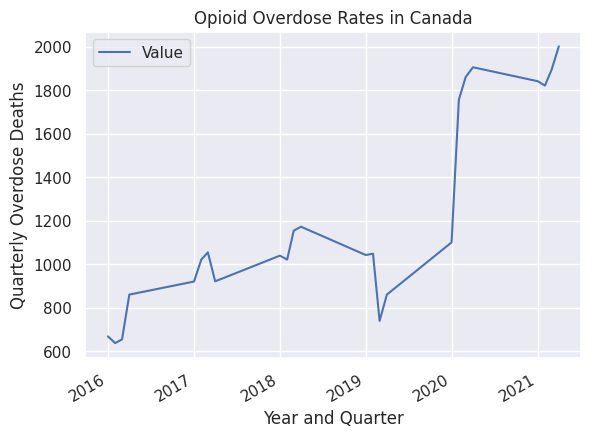

In [85]:
# create line plot using index for x-axis and 'Value' for y-axis
can_deaths_by_quarter.plot(kind='line', y='Value')
plt.xlabel('Year and Quarter')
plt.ylabel('Quarterly Overdose Deaths')
plt.title('Opioid Overdose Rates in Canada')
plt.show()